In [91]:
import glob
import re
import random
import random
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm.notebook import trange, tqdm
from deep_shadow import *
from utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
deep_shadow = DeepShadow(512, 512)
deep_shadow.restore('training_checkpoints/evaluation_new/uniform_cities')

In [8]:
height_path = 'data/heights_new/'
output_folder = 'data/shadows_new/'

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/1445 [00:00<?, ?it/s]

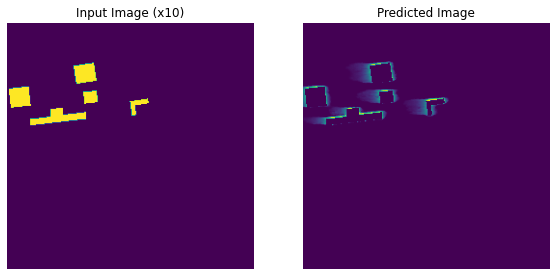

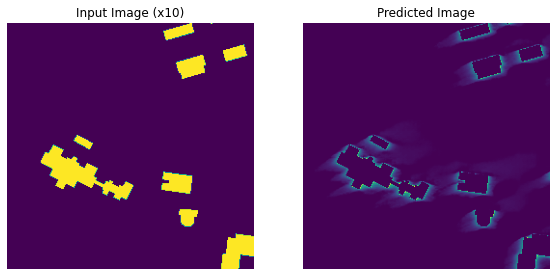

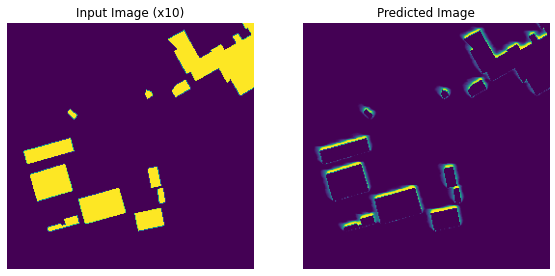

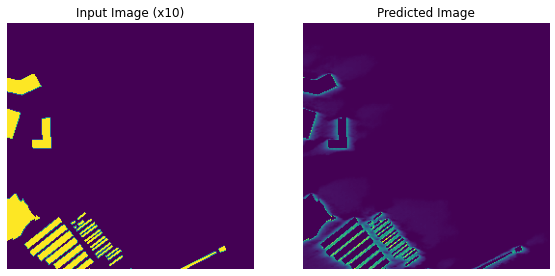

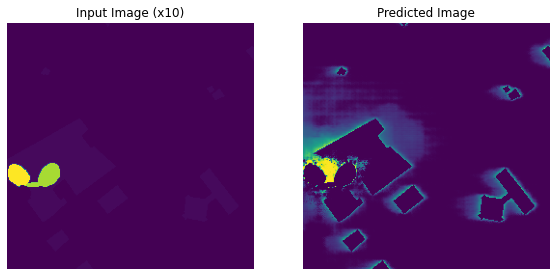

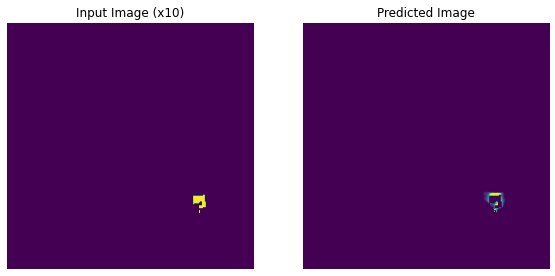

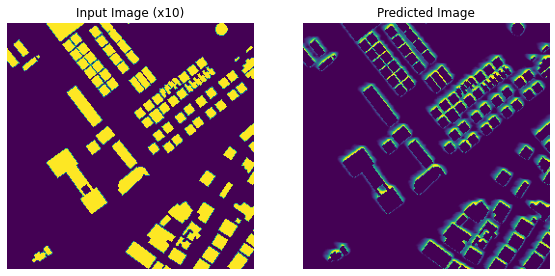

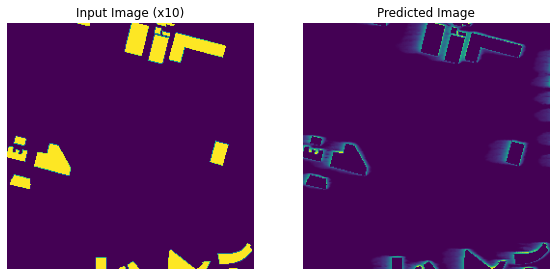

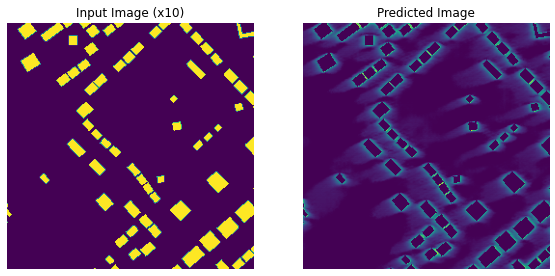

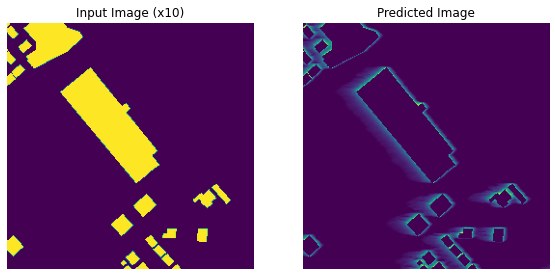

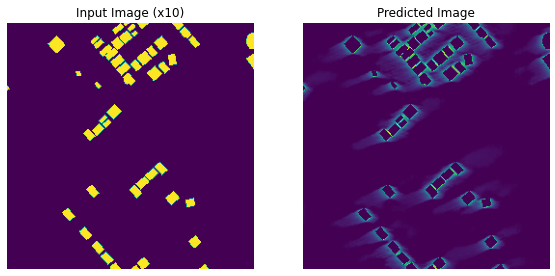

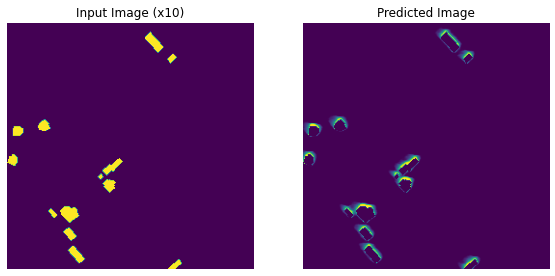

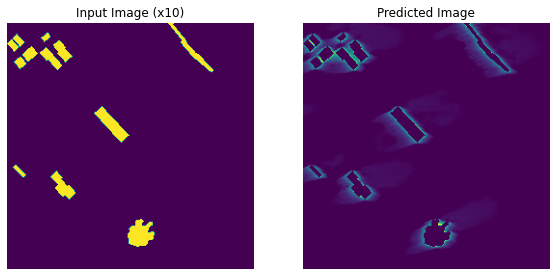

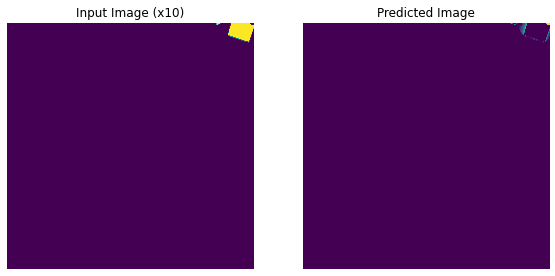

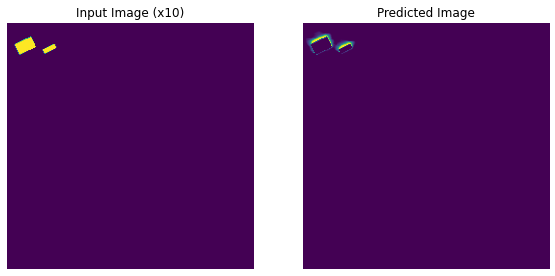

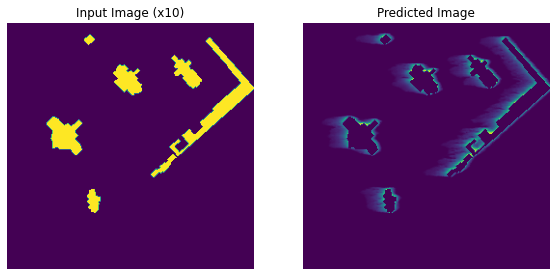

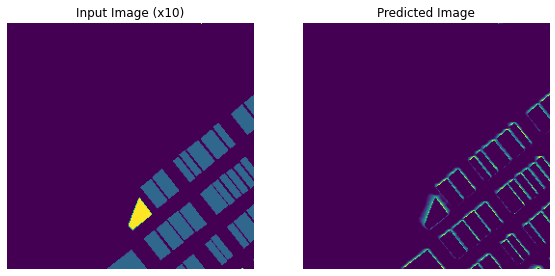

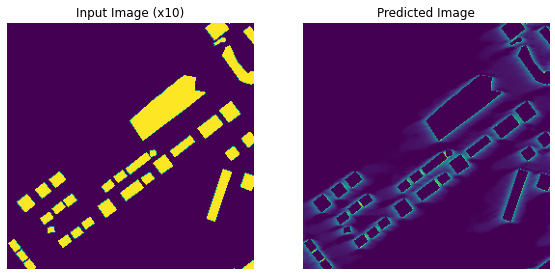

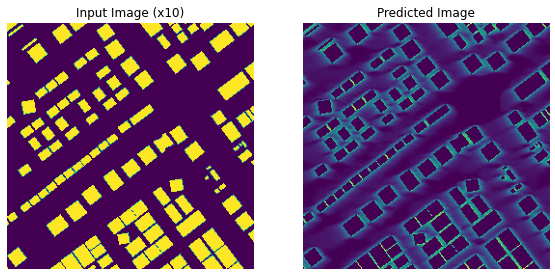

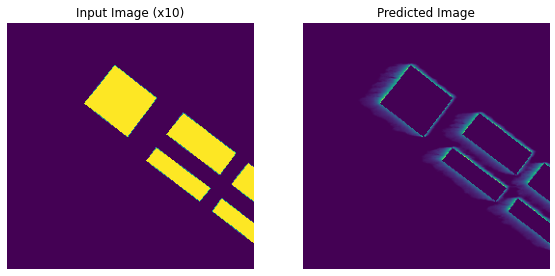

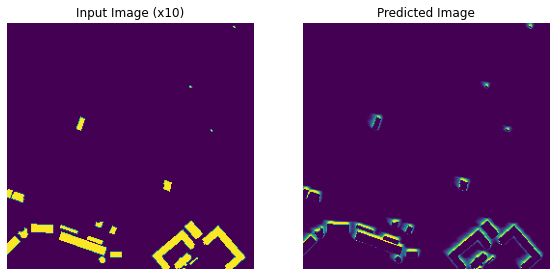

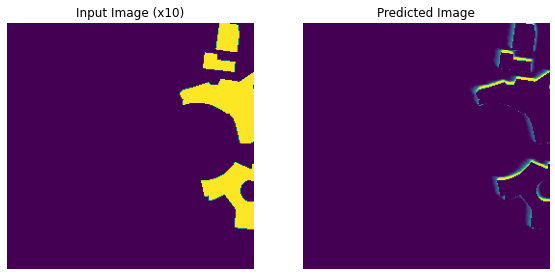

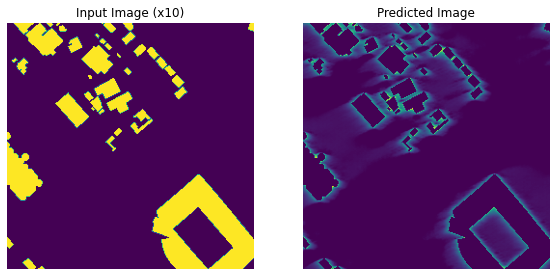

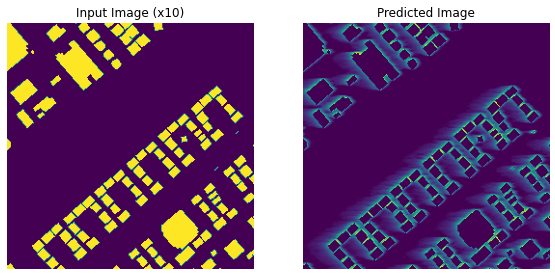

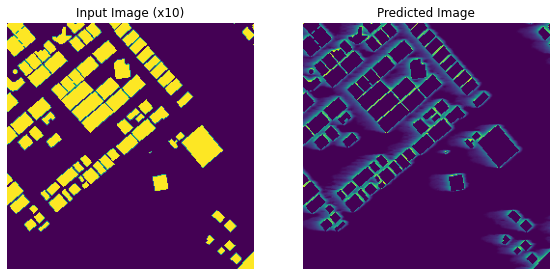

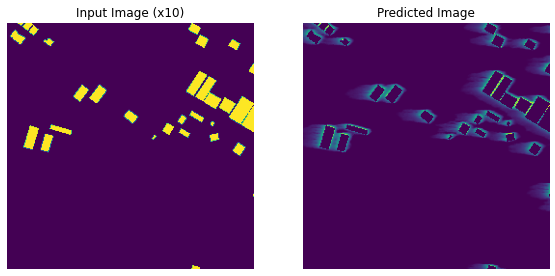

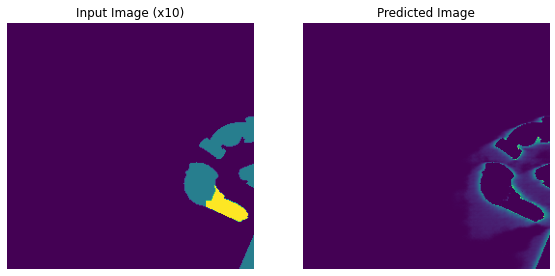

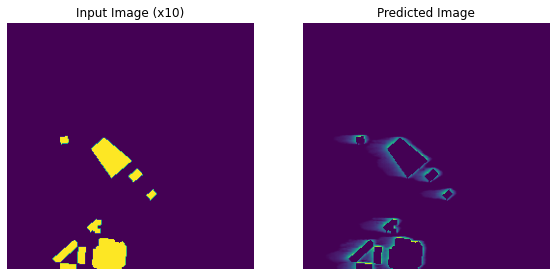

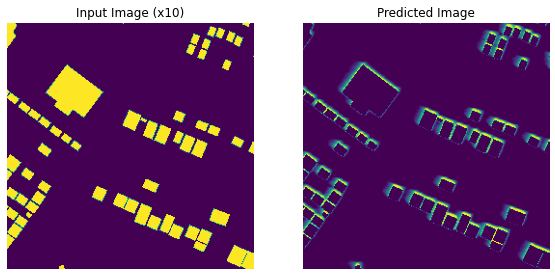

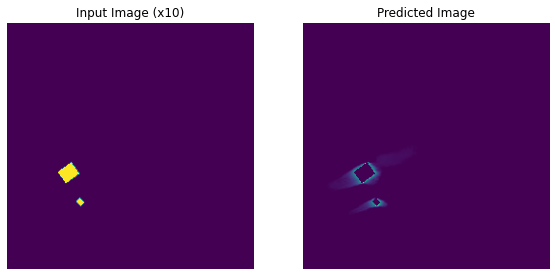

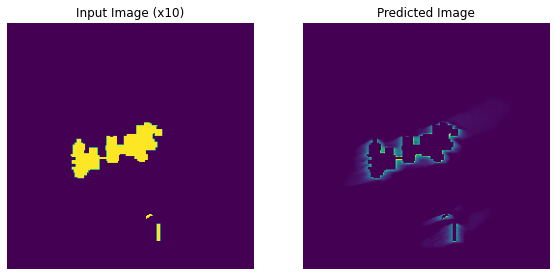

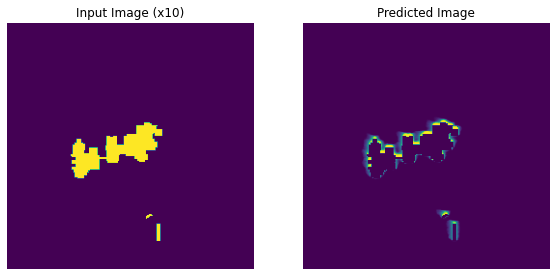

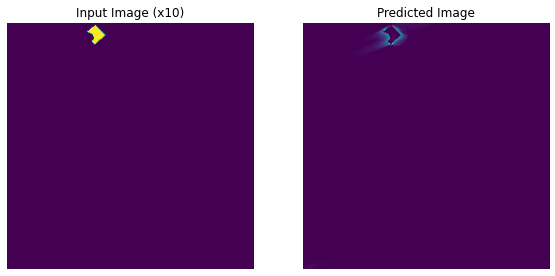

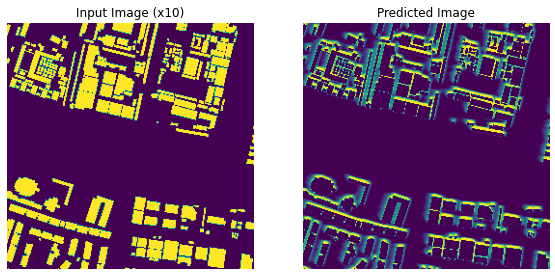

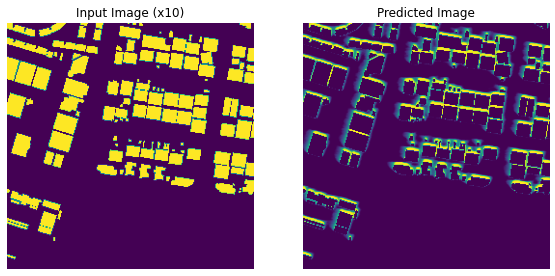

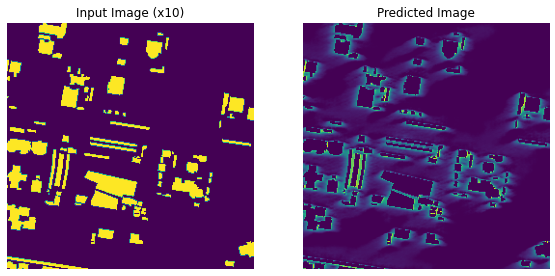

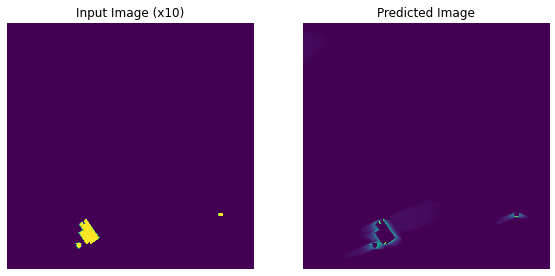

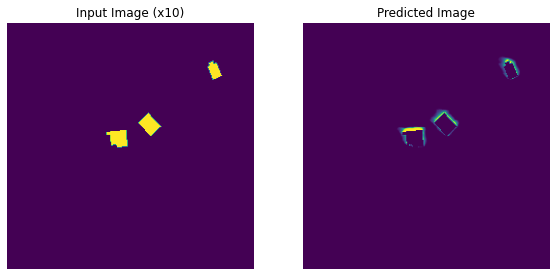

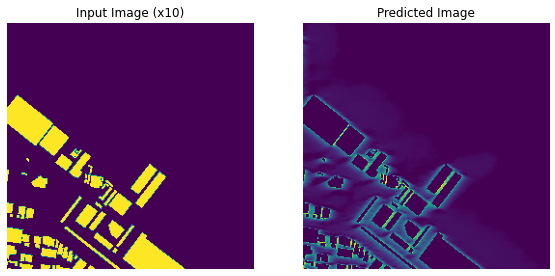

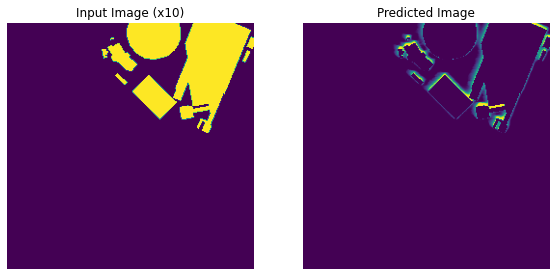

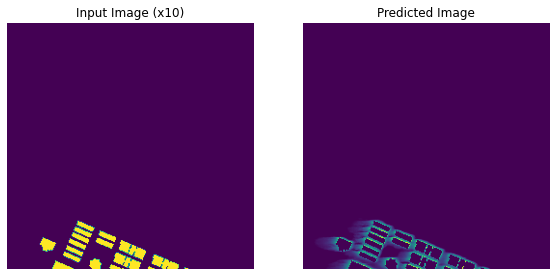

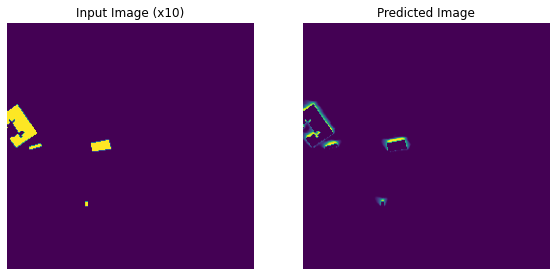

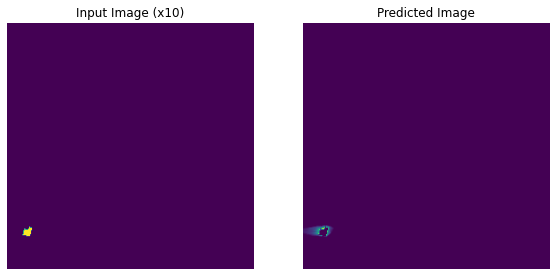

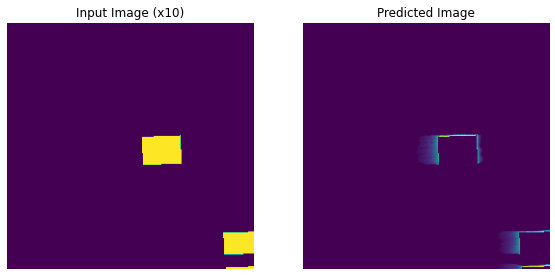

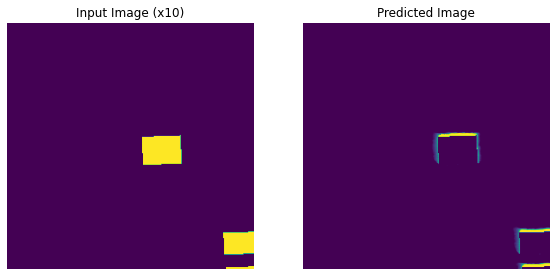

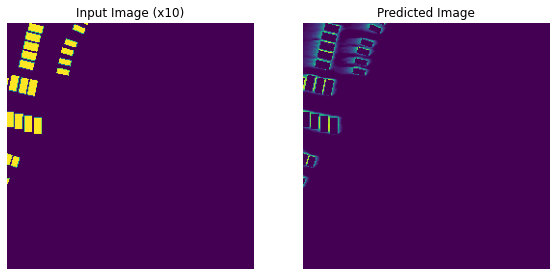

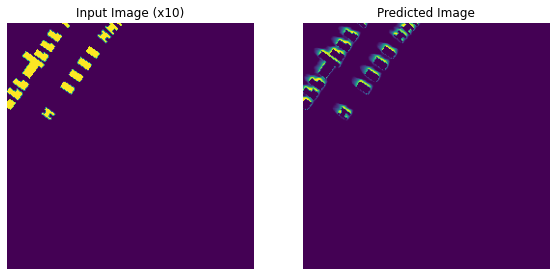

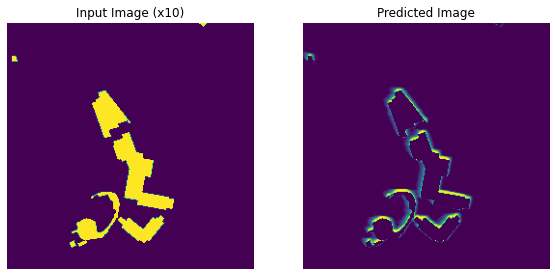

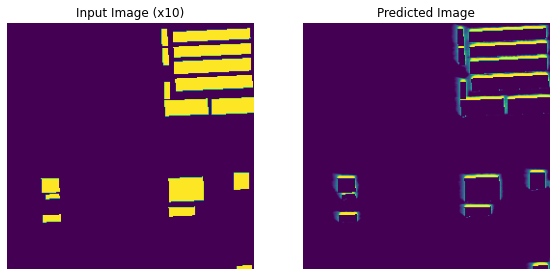

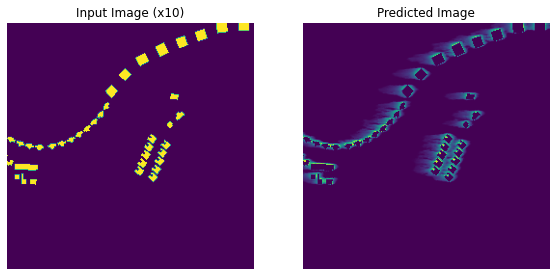

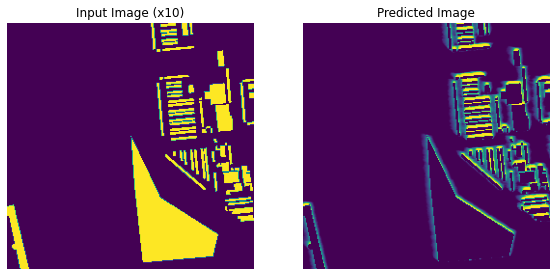

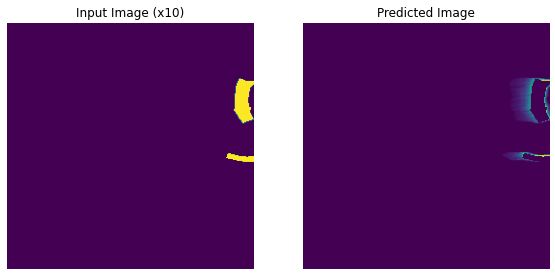

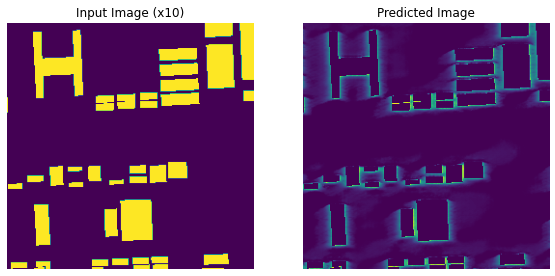

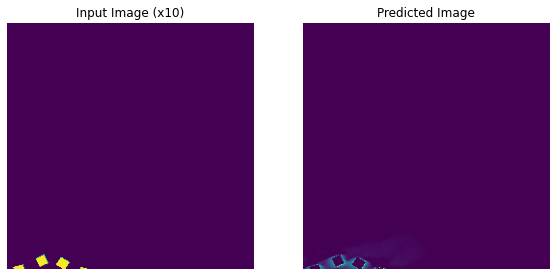

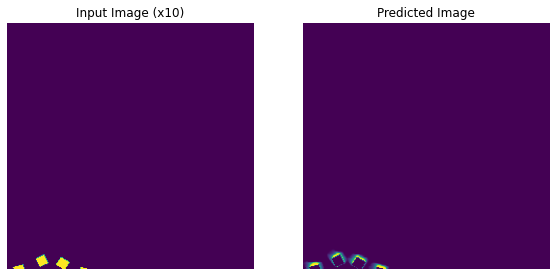

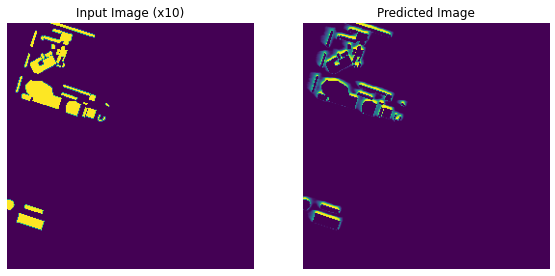

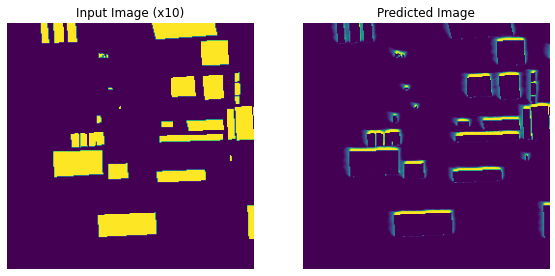

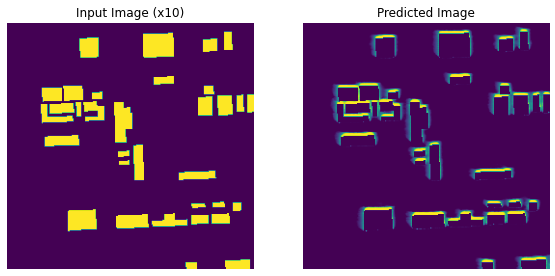

In [ ]:
paths = glob.glob('%s/*/'%height_path)
for path in tqdm(paths):
    files = glob.glob(path+'/*/*/*.png')
    for filepath in tqdm(files):
        dates = ['spring', 'summer', 'winter']
        for date in dates:
            tks = re.findall(r'(\d+|[a-zA-Z]+)', filepath)
            city, zoom, i, j = tks[-5], int(tks[-4]), int(tks[-3]), int(tks[-2])
            input_height, input_lat, input_date = load_input_grid(height_path, city, date, zoom, i, j)
            input_height, input_lat, input_date = normalize_input(input_height, input_lat, input_date)
            input_height = np.array(input_height).reshape(1,512,512,1)
            input_lat = np.array(input_lat).reshape(1,512,512,1)
            input_date = np.array(input_date).reshape(1,512,512,1)
            prediction = deep_shadow.generator([input_height, input_lat, input_date], training=True)
            
            height = input_height[:,128:-128,128:-128,:]
            height = height * 0.5 + 0.5
            prediction = prediction.numpy()[:,128:-128,128:-128,:]
            prediction = prediction * 0.5 + 0.5
            
            folder = '%s/%s-%s/%d/%d/'%(output_folder,city,date,zoom,i)
            if not os.path.exists(folder):
                os.makedirs(folder)
            
            outputpath = '%s/%s-%s/%d/%d/%d.png'%(output_folder,city,date,zoom,i,j)
            cv2.imwrite(outputpath, prediction[0]*255)
            
            if random.random() <= 0.05:
                plot_result(height[0], prediction[0])
        
#             plot_result(height[0],  prediction[0])
#             target_image = tf.io.read_file('data/shadows/%s-%s/%d/%d/%d.png'%(city,date,zoom,i,j))
#             target_image = tf.io.decode_png(target_image)[:,:,0]
#             target_image = tf.reshape(target_image, (256, 256, 1))
#             target_image = tf.cast(target_image, tf.float32)
#             plot_comparison(height[0], target_image, prediction[0])
#             break
#         break
#     break